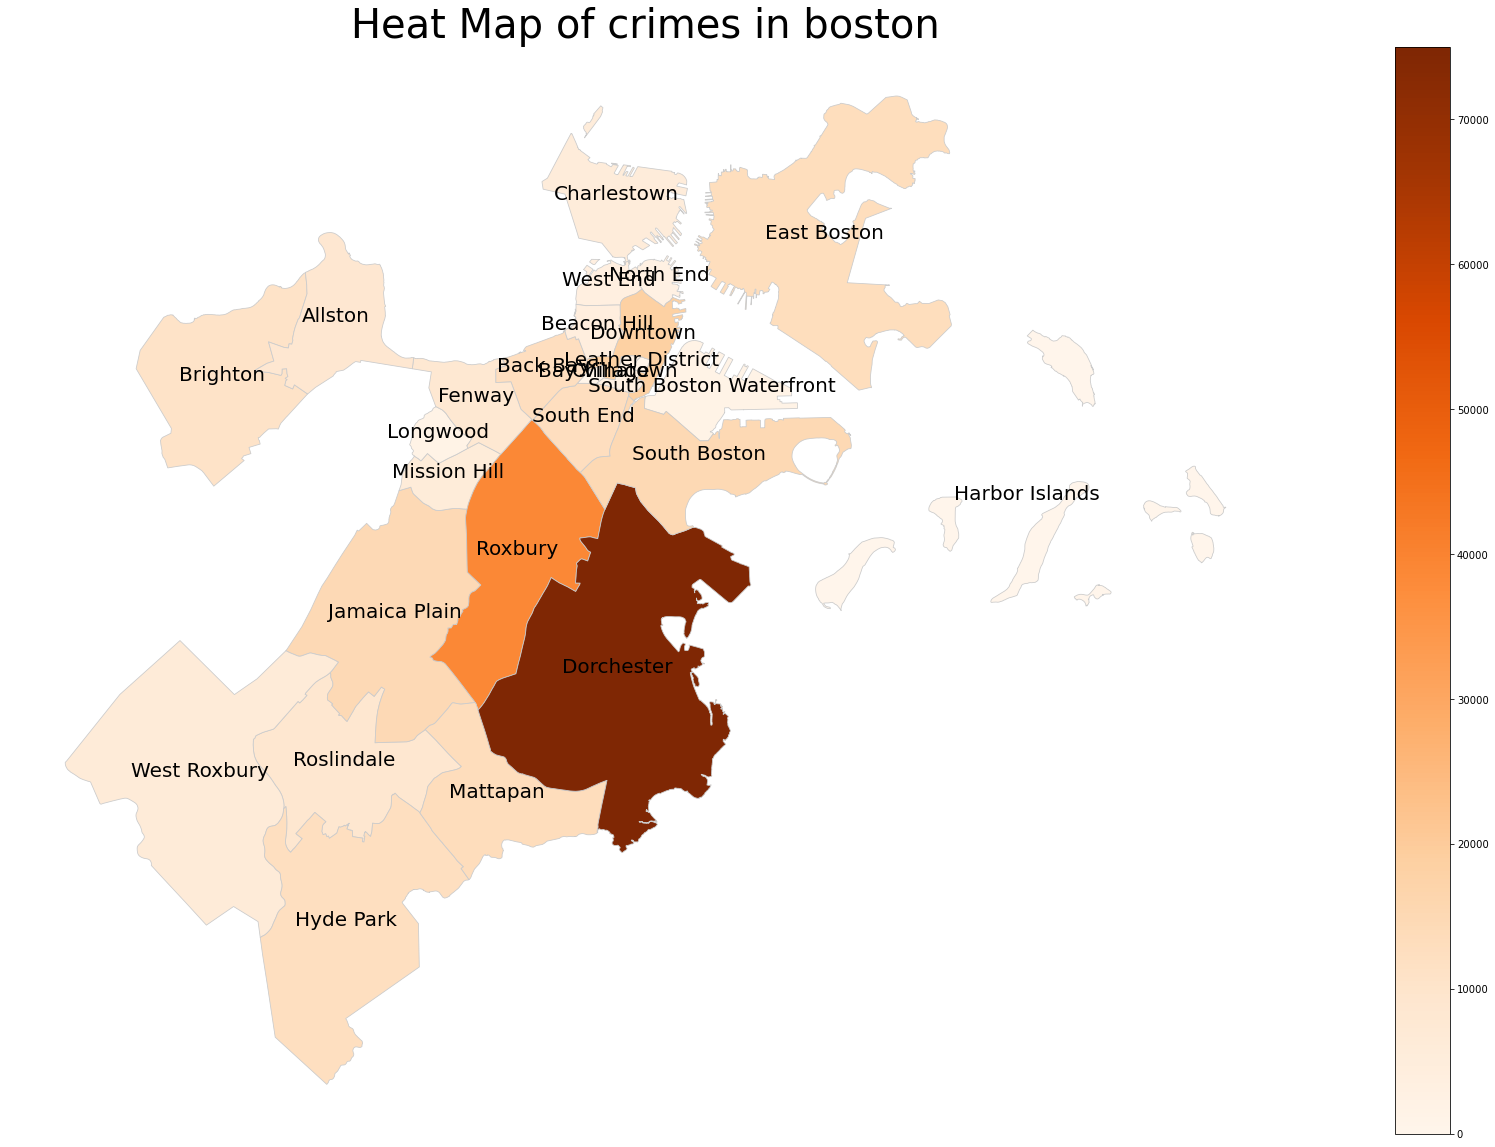

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
# CSV Datei lesen
crime = pd.read_csv("data/crime.csv", encoding="ISO-8859-1")

#zip x und y Koordinaten zu einen Point(xy)
geometry = [Point(xy) for xy in zip(crime['Long'], crime['Lat'])]

#Geopandas DF generieren
geo_df = gpd.GeoDataFrame(crime, crs="EPSG:4326",geometry=geometry)

#Neighbourhood_map generieren
neighbourhood_map = gpd.read_file('C:/Users/olile/Python/04_Boston_Crime/Boston Neighborhoods/Boston_Neighborhoods.shp')
neighbourhood_map =neighbourhood_map.to_crs(epsg=4326)
#print(neighbourhood_map)

# Relevanten Spalten filtern
neighbourhood_map = neighbourhood_map[["Name","geometry"]]
geo_df=geo_df[["geometry","OFFENSE_CODE_GROUP"]]

# Points mit Map joinen
joined_map=gpd.sjoin(neighbourhood_map,geo_df,how="inner")

# Spalte mit Counter
joined_map["Count"]=1

# Counter Spalte summieren
grouped_map= joined_map.groupby(["Name"]).Count.sum()

# DF erstellen
neighbourhood_df=pd.DataFrame(grouped_map)

# Geodataframe und Dataframe joinen
heatmap= neighbourhood_map.join(neighbourhood_df,on="Name",how="inner")
heatmap.sort_values(by="Count",ascending=False)

# Zentrale Koordinaten generieren für die Beschriftung
heatmap["coordinates"] = heatmap['geometry'].apply(lambda x: x.centroid.coords[0])

# Heatmap plotten
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of crimes in boston', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 75000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


heatmap.plot('Count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

# Beschriftung in Grafik hinzufügen
for idx, row in heatmap.iterrows():
    plt.annotate(text=row["Name"],xy=(row["coordinates"][0],row["coordinates"][1]), horizontalalignment='center',fontsize=20)

plt.show()